# All together

### Imports

In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
import math

from lib2to3.pgen2 import driver
from bs4 import BeautifulSoup
import requests
import requests as r

import matplotlib.pyplot as plt
%matplotlib inline
sns.set()



### Data Input

In [2]:
wiki_page_request = r.get("https://www.heritage.org/index/explore?view=by-variables&u=637545768379084285")
wiki_page_text = wiki_page_request.text

### read data using pandas

In [3]:
df_list = pd.read_html(wiki_page_text) 
df = df_list[0]
df.head()

,name,Overall Score,Tariff Rate,Income Tax Rate,Corporate Tax Rate,Population (millions),GDP (billions),GDP per Capita,Unemployment Rate,Inflation Rate,FDI Inflow (millions),Tax Burden % GDP,Govt. Expenditure % GDP
0,Afghanistan,53.0,5.7,20.0,20.0,38.0,76.6,2294.0,11.1,2.3,38.5,9.3,28.2
1,Albania,65.2,3.6,23.0,15.0,2.9,39.8,14495.0,12.3,1.4,1281.3,18.6,29.1
2,Algeria,49.7,13.8,35.0,26.0,43.1,668.8,11820.0,11.7,2.0,1381.9,37.2,38.5
3,Angola,54.2,7.4,17.0,30.0,31.8,200.8,6930.0,6.9,17.1,-4098.5,9.2,20.9
4,Argentina,52.7,13.7,35.0,30.0,44.9,911.6,22947.0,9.8,53.5,6244.4,28.9,39.6


### Read data using BeautifullSoup

In [4]:

# New code below
soup = BeautifulSoup(wiki_page_text, 'html.parser')
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup ]


# required_table = None
# print(filtered_table_soup)

#that's for specific table caption # not needed now 
# for table in filtered_table_soup:
#     if str(table.caption.string).strip() == 'Explore the Data':
#         required_table = table
#         break

required_table=table=filtered_table_soup[0]

data_rows = required_table.find_all('tr')
rows = []
for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows.append(beautified_value)

#create a pandas dataframe from rows
df = pd.DataFrame(rows,columns=["name",
                               "Overall Score",
                               "Tariff Rate",
                               "Income Tax Rate",
                               "Corporate Tax Rate",
                               "Population (millions)",
                               "GDP (billions)",
                               "GDP per Capita",
                               "Unemployment Rate",
                               "Inflation Rate",
                               "FDI Inflow (millions)",
                               "Tax Burden % GDP",
                               "Govt. Expenditure % GDP"])


df = df.apply (pd.to_numeric, errors='coerce')
df.head(50)

,name,Overall Score,Tariff Rate,Income Tax Rate,Corporate Tax Rate,Population (millions),GDP (billions),GDP per Capita,Unemployment Rate,Inflation Rate,FDI Inflow (millions),Tax Burden % GDP,Govt. Expenditure % GDP
0,NaN,53.0,5.7,20.0,20.0,38.0,76.6,2294.0,11.1,2.3,38.5,9.3,28.2
1,NaN,65.2,3.6,23.0,15.0,2.9,39.8,14495.0,12.3,1.4,1281.3,18.6,29.1
2,NaN,49.7,13.8,35.0,26.0,43.1,668.8,11820.0,11.7,2.0,1381.9,37.2,38.5
3,NaN,54.2,7.4,17.0,30.0,31.8,200.8,6930.0,6.9,17.1,-4098.5,9.2,20.9
4,NaN,52.7,13.7,35.0,30.0,44.9,911.6,22947.0,9.8,53.5,6244.4,28.9,39.6
5,NaN,71.9,5.6,23.0,18.0,3.0,33.4,14220.0,17.0,1.4,254.5,20.9,25.0
6,NaN,82.4,2.6,45.0,30.0,25.4,1362.1,53320.0,5.3,1.6,36156.2,28.5,37.4
7,NaN,73.9,3.0,55.0,25.0,8.9,476.8,59111.0,4.7,1.5,4642.6,42.2,48.6
8,NaN,70.1,8.5,25.0,20.0,10.0,187.3,15001.0,5.5,2.6,1503.9,13.0,34.1
9,NaN,69.9,5.7,0.0,0.0,1.6,76.9,46892.0,0.7,1.0,941.8,1.1,33.1


## Plots and insights


In [5]:
#df[["Unemployment Rate","Govt. Expenditure % GDP"]].plot()
#df.plot.area(figsize=(12, 24), subplots=True)

df=df.drop(['name'], axis=1)
#df.corr(method ='pearson')



#### normalize

In [6]:
columns = df.columns
for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    
df.corr(method ='pearson')

,Overall Score,Tariff Rate,Income Tax Rate,Corporate Tax Rate,Population (millions),GDP (billions),GDP per Capita,Unemployment Rate,Inflation Rate,FDI Inflow (millions),Tax Burden % GDP,Govt. Expenditure % GDP
Overall Score,1.000000,-0.597881,-0.003565,-0.406285,-0.042415,0.100833,0.682717,-0.203689,-0.276891,0.254093,0.285896,0.054760
Tariff Rate,-0.597881,1.000000,0.039203,0.333975,-0.024817,-0.153250,-0.559888,0.151134,0.079533,-0.238744,-0.299956,-0.141302
Income Tax Rate,-0.003565,0.039203,1.000000,0.574077,0.121631,0.159380,0.055775,-0.037779,0.033307,0.207996,0.414765,0.014000
Corporate Tax Rate,-0.406285,0.333975,0.574077,1.000000,0.110698,0.011823,-0.407668,0.036612,0.093531,-0.021473,-0.016976,-0.193814
Population (millions),-0.042415,-0.024817,0.121631,0.110698,1.000000,0.813726,-0.044615,-0.068809,-0.006559,0.505172,-0.144329,-0.066088
GDP (billions),0.100833,-0.153250,0.159380,0.011823,0.813726,1.000000,0.152354,-0.089282,-0.015851,0.807562,-0.017388,0.026908
GDP per Capita,0.682717,-0.559888,0.055775,-0.407668,-0.044615,0.152354,1.000000,-0.179964,-0.053559,0.341275,0.398318,0.258814
Unemployment Rate,-0.203689,0.151134,-0.037779,0.036612,-0.068809,-0.089282,-0.179964,1.000000,0.206246,-0.109321,0.136201,0.121145
Inflation Rate,-0.276891,0.079533,0.033307,0.093531,-0.006559,-0.015851,-0.053559,0.206246,1.000000,-0.022164,0.020977,0.019693
FDI Inflow (millions),0.254093,-0.238744,0.207996,-0.021473,0.505172,0.807562,0.341275,-0.109321,-0.022164,1.000000,0.100484,0.061257


## Extracting needed columns for regression


will feed  GDP and unemployment to the function

deal with missing data

prepare X and Y

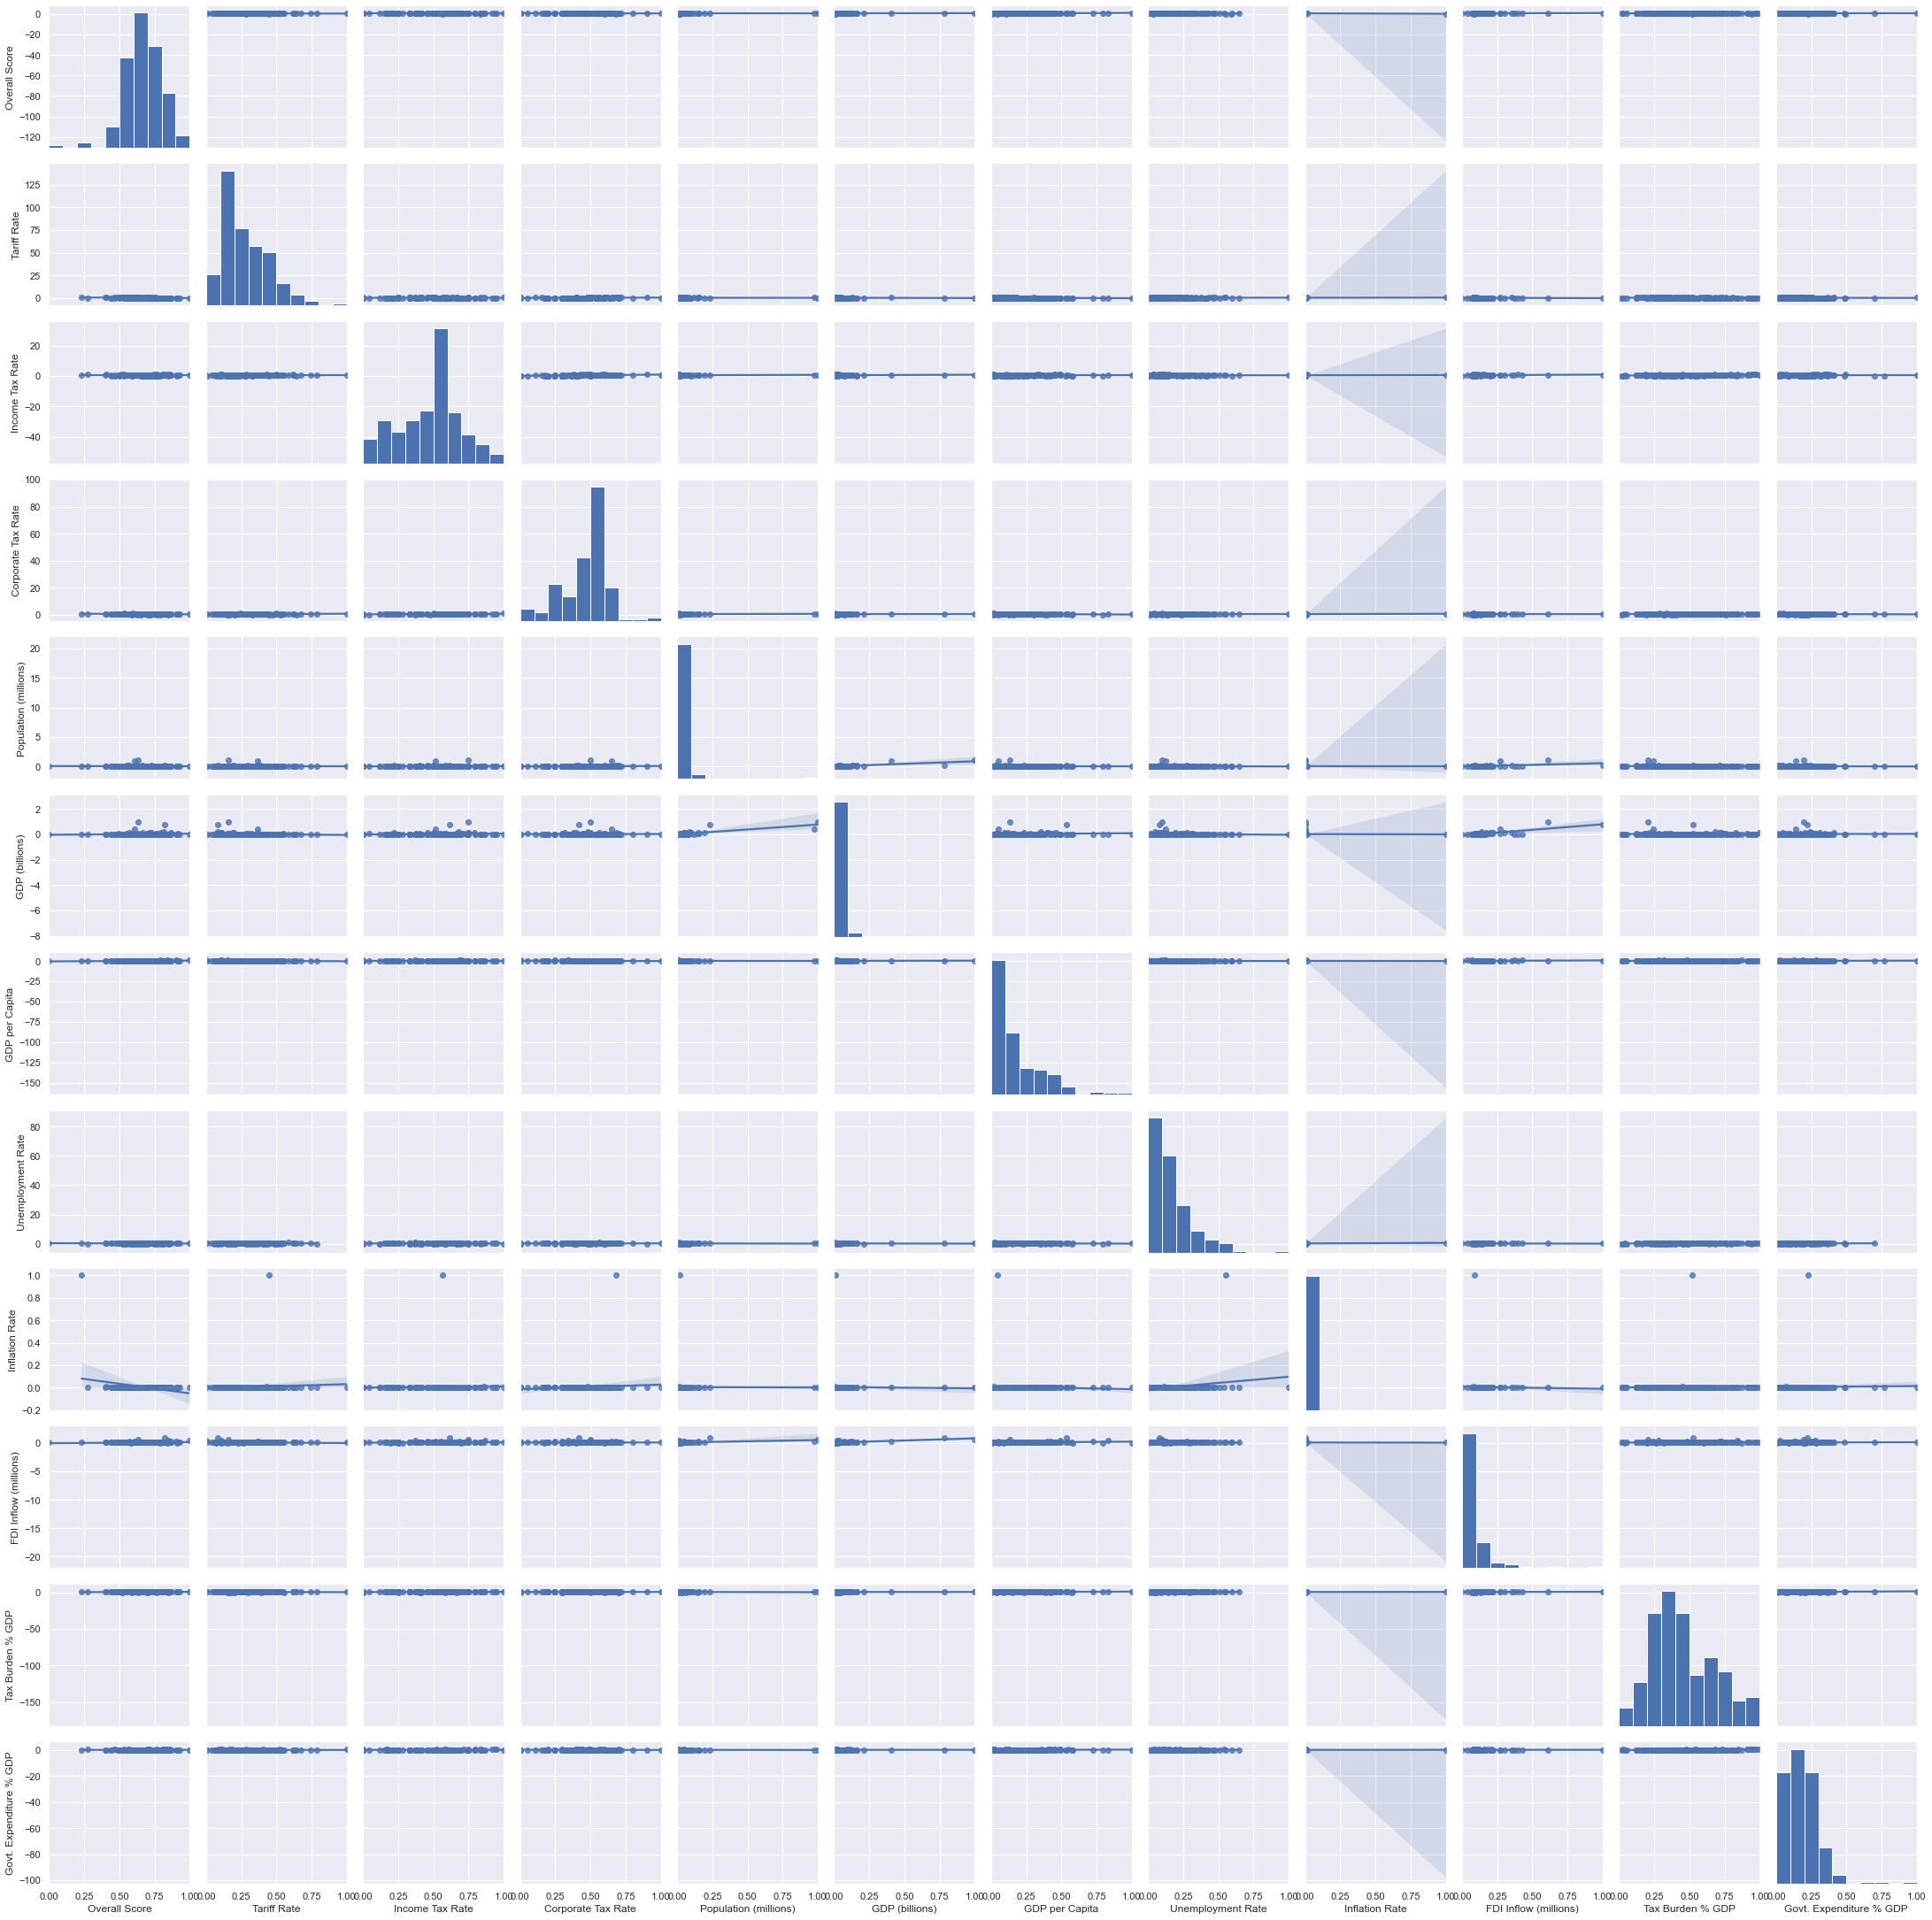

In [7]:
dataXY=df[["Population (millions)","GDP (billions)"]]

dataXY = dataXY.dropna()
#here you could fill the missing values with something like mean, dropping those rows is much easier

# dataXY.head()
# X=dataXY["Population (millions)"].to_numpy()
# Y=dataXY["GDP (billions)"].to_numpy()

sns.pairplot(df, kind="reg")


XY=dataXY.to_numpy()
X, Y = XY.T


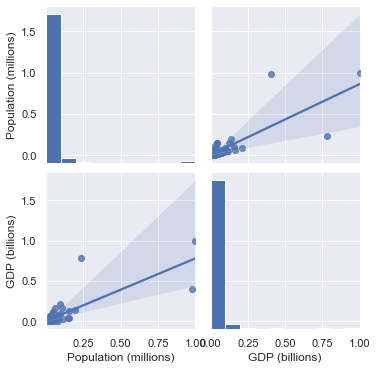

In [8]:

sns.pairplot(dataXY, kind="reg")

## lr_function


In [9]:
def my_regression(X, Y):
    
    X=np.array(X)
    Y=np.array(Y)
    
    def mean(Xs):
        return sum(Xs) / len(Xs)

    m_X = mean(X)
    m_Y = mean(Y)

    def std(Xs, m):
        normalizer = len(Xs) - 1
        return math.sqrt(sum((pow(x - m, 2) for x in Xs)) / normalizer)

    # assert np.round(Series(X).std(), 6) == np.round(std(X, m_X), 6)

    def pearson_r(Xs, Ys):
        sum_xy = 0
        sum_sq_v_x = 0
        sum_sq_v_y = 0

        for (x, y) in zip(Xs, Ys):
            var_x = x - m_X
            var_y = y - m_Y
            sum_xy += var_x * var_y
            sum_sq_v_x += pow(var_x, 2)
            sum_sq_v_y += pow(var_y, 2)
        return sum_xy / math.sqrt(sum_sq_v_x * sum_sq_v_y)

    # assert np.round(Series(X).corr(Series(Y)), 6) == np.round(pearson_r(X, Y), 6)

    r = pearson_r(X, Y)

    b = r * (std(Y, m_Y) / std(X, m_X))
    A = m_Y - b * m_X
    print("b:", b, "a:", A)

    def line(x):
        x=np.array(x)
        # calculates Y values.
        return b * x + A

    return line  # fonksiyon return ediyor.


### testing

In [10]:
#predict on already existing X
predict =my_regression(X,Y)

predictions = predict(X)
print("MAE:", np.absolute(Y - predictions).mean())

b: 0.7743333831982798 a: 0.005173513015918039
MAE: 0.019966945114357634


In [11]:
# for i in range(len(predictions)):
#     print("X: ",X[i] ,"Y: ",Y[i] ,"pred: ", predictions[i])
    
dataXY

,Population (millions),GDP (billions)
0,0.027188,0.002794
1,0.002075,0.001447
2,0.030836,0.024481
3,0.022752,0.007343
4,0.032124,0.033373
...,...,...
179,0.020391,0.007386
180,0.069042,0.036665
181,0.020891,0.002629
182,0.012807,0.002769


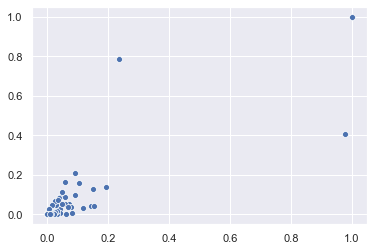

In [12]:
sns.scatterplot(X,Y)

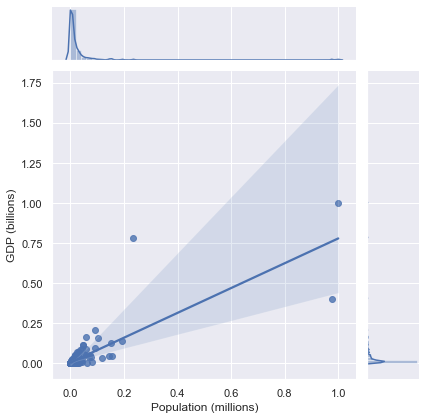

In [13]:
sns.jointplot(x='Population (millions)', y='GDP (billions)' , data=dataXY, kind="reg");

#### generate random data for testing 

In [14]:
res = np.dstack((X,Y,predictions))

In [15]:
res=np.squeeze(res)

In [16]:
print(res)


[[2.71875224e-02 2.79418604e-03 2.62257192e-02]
 [2.07483723e-03 1.44653144e-03 6.78012875e-03]
 [3.08363740e-02 2.44811713e-02 2.90511469e-02]
 [2.27516634e-02 7.34252033e-03 2.27908855e-02]
 [3.21242040e-02 3.33727620e-02 3.00483566e-02]
 [2.14638334e-03 1.21215672e-03 6.83552929e-03]
 [1.81727123e-02 4.98705446e-02 1.92452508e-02]
 [6.36760392e-03 1.74499299e-02 1.01041613e-02]
 [7.15461115e-03 6.84813617e-03 1.07135673e-02]
 [1.14473778e-03 2.80517236e-03 6.05992170e-03]
 [1.16620162e-01 3.06994254e-02 9.54763974e-02]
 [2.14638334e-04 1.86767350e-04 5.33971464e-03]
 [6.79688059e-03 7.13378035e-03 1.04365646e-02]
 [8.22780282e-03 2.09692127e-02 1.15445754e-02]
 [2.86184446e-04 1.13525252e-04 5.39511519e-03]
 [8.44244115e-03 1.47582828e-03 1.17107770e-02]
 [5.72368892e-04 2.78319973e-04 5.61671736e-03]
 [8.22780282e-03 3.40941967e-03 1.15445754e-02]
 [2.36102168e-03 1.80907982e-03 7.00173092e-03]
 [1.64556056e-03 1.59667774e-03 6.44772549e-03]
 [1.50962295e-01 1.27452237e-01 1.220686

In [17]:
d=pd.DataFrame(res, columns=['X','Y','predictions'])

In [18]:
d.head()

,X,Y,predictions
0,0.027188,0.002794,0.026226
1,0.002075,0.001447,0.006780
2,0.030836,0.024481,0.029051
3,0.022752,0.007343,0.022791
4,0.032124,0.033373,0.030048


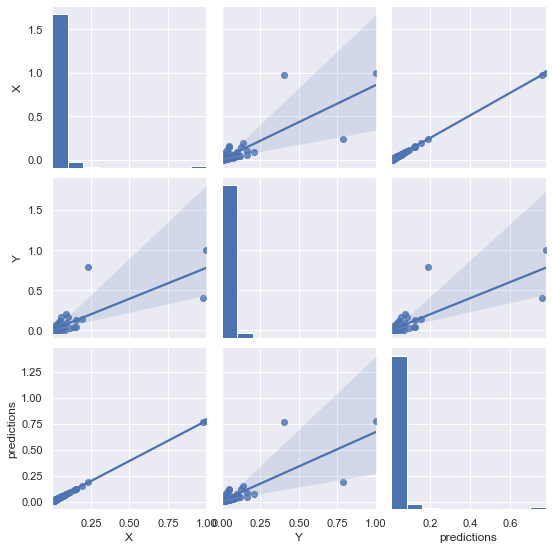

In [19]:
sns.pairplot(d, kind="reg")